# Capstone project: the best and worst US cities to build solar power plants

Nathan Oyama. July 30, 2025.

## 1 &emsp; Planning the project

There are four data sets to accomplish this project. 

* Kaggle: "Percent Sunshine by US City". 18 Jan 2023. kaggle.com/datasets/thedevastator/annual-percent-of-possible-sunshine-by-us-city.

* US Geological Survey: "The United States Large-Scale Solar Photovoltaic Database (USPVDB)". 28 Apr 2025. US Department of the Interior. energy.usgs.gov/uspvdb/data.

* landvalue: "ZHVI 3-Bedroom Time Series($) - City". 25 Jun 2025. landvalue.com/research/data.

* Pareto Software: "United States Cities Database - Basic". 9 Jun 2025. simplemaps.com/data/us-cities.

Then take the following steps _for every dataset_:

1. From the data set which is in CSV format, create a pandas DataFrame object.
1. Analyze every DataFrame and identify which columns to use for this project.
1. Format the data set before merging them.

Merge the three data sets into one.

Split this DataFrame into two: the first group contains the city records with solar power currents, and the second group contains the city records with no solar power plant at all.

With the first group of city records, build models by using various machine learning algorithms and hyperparameters of these and figure out which model works the best.

Finally, rebuld a model with the best algorithm and its hyperparameters, and the entire data set of the first group to make this new model more accurate. Apply this new model to the second group of the data set, as if those cities had solar power plants. If those cities have high predicted currents, they may be suitable to build actual solar power plants.

## 2 &emsp; Analyzing Data Sets

Before loading and analyzing the data sets in your Python environment, you need to import the required package resources. In addition to the packages that you have used in this program, namely, numpy, pandas, scikit-learn, and Matplotlib, you need to install Cartopy to draw a map of the United States to plot data on it.

In [1]:
# Uncomment either one of the following shell script lines to install Cartopy:

# !conda install cartopy
# !pip   install Cartopy

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True

import warnings
warnings.filterwarnings("ignore", message=".*pkg_resources is deprecated as an API.*")
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LinearRegression, Ridge
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.svm             import SVR
from sklearn.ensemble        import VotingRegressor
from sklearn.inspection      import permutation_importance

import matplotlib.pyplot  as plt
from   matplotlib.lines   import Line2D

import cartopy.crs     as ccrs
import cartopy.feature as cfeature

### 2.1 &emsp; Analyzing Data Set 1: "Percent Sunshine by US City"

In [3]:
df_sunshine_original = pd.read_csv(
    './data/Average Percent of Possible Sunshine by US City.csv'
    )

df_sunshine_original.head()

,index,CITY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Unnamed: 14
0,0,"BIRMINGHAM,AL",46,53,57,65,65,67,59,62,59,66,55,49,58,NaN
1,1,"MONTGOMERY,AL",47,55,58,64,63,64,61,61,59,63,55,49,58,NaN
2,2,"ANCHORAGE,AK",43,46,51,50,51,46,43,43,41,36,35,33,43,NaN
3,3,"JUNEAU,AK",39,35,38,42,44,37,33,35,27,21,26,21,33,NaN
4,4,"NOME,AK",38,56,54,52,52,43,39,34,38,35,30,36,42,NaN


See the first few records of the original DataFrame for sunshine hours. You can ignore and discard some unimportant columns: "index" and "Unnamed: 14".

The remaining columns are the "CITY" column, the columns of all 12 months such as "JAN" and "FEB", and the annual. The "CITY" column includes the name of the city in all uppercase, followed by a comma (",") and the state abbreviation. You can use this column for the index of this DataFrame. The column for each month represents the number of sunshine hours of the month for every city. The "ANN" field represents the average of those monthly sunshine hours. For example, the city of Birmingham, Alabama observed approximately 46 sunshine hours in January; in average, Birmingham observed approximately 58 sunshine hours per month.

In [4]:
df_sunshine_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        317 non-null    int64  
 1   CITY         317 non-null    object 
 2   JAN          307 non-null    object 
 3   FEB          309 non-null    object 
 4   MAR          309 non-null    object 
 5   APR          309 non-null    object 
 6   MAY          311 non-null    object 
 7   JUN          311 non-null    object 
 8   JUL          317 non-null    object 
 9   AUG          317 non-null    object 
 10  SEP          317 non-null    object 
 11  OCT          317 non-null    object 
 12  NOV          317 non-null    object 
 13  DEC          313 non-null    object 
 14  ANN          307 non-null    object 
 15  Unnamed: 14  0 non-null      float64
dtypes: float64(1), int64(1), object(14)
memory usage: 39.8+ KB


### 2.2 &emsp; Analyzing Data Set 2: "The US Large-Scale Solar Photovoltaic Database (USPVDB)"

In [5]:
df_photovoltaic_original = pd.read_csv(
    './data/uspvdb_v3_0_20250430.csv'
    )

In [6]:
print("df_photovoltaic_original.shape ...", df_photovoltaic_original.shape)

df_photovoltaic_original.shape ... (5712, 26)


In [7]:
df_photovoltaic_original.iloc[:,:13].head()

,case_id,multi_poly,eia_id,p_state,p_county,ylat,xlong,p_area,p_img_date,p_dig_conf,p_name,p_year,p_pwr_reg
0,406374,single,66887,AK,Matanuska-Susitna,61.587349,-149.789413,172005,20240814,4,Houston Solar,2023,AK
1,405016,multi,6304,AK,Northwest Arctic,66.838470,-162.553146,8740,20240719,4,Kotzebue Hybrid,2020,NaN
2,401476,multi,60058,AL,Lauderdale,34.833809,-87.838394,1735134,20220212,4,"River Bend Solar, LLC",2016,TVA
3,401865,multi,60679,AL,Dale,31.331732,-85.729469,187820,20220609,4,Fort Rucker Solar Array,2017,SOCO
4,401866,multi,60680,AL,Calhoun,33.626301,-85.940590,39717,20210814,4,ANAD Solar Array,2017,SOCO


In [8]:
df_photovoltaic_original.iloc[:,13:26].head()

,p_tech_pri,p_tech_sec,p_sys_type,p_axis,p_azimuth,p_tilt,p_battery,p_cap_ac,p_cap_dc,p_type,p_agrivolt,p_comm,p_zscore
0,PV,NaN,ground,fixed-tilt,180.0,40.0,NaN,6.0,8.4,greenfield,crop,NaN,-0.457675
1,PV,NaN,ground,single-axis,156.0,40.0,batteries,1.7,3.4,greenfield,non-agrivoltaic,NaN,5.617232
2,PV,c-si,ground,single-axis,270.0,17.0,NaN,75.0,100.2,greenfield,non-agrivoltaic,NaN,-0.298527
3,PV,thin-film,ground,single-axis,188.0,20.0,NaN,10.6,12.7,greenfield,non-agrivoltaic,NaN,-0.122265
4,PV,thin-film,ground,fixed-tilt,180.0,20.0,NaN,7.4,9.7,superfund,non-agrivoltaic,NaN,3.031619


In [9]:
df_photovoltaic_original.query('p_cap_ac.isnull() | p_cap_dc.isnull()').shape

(0, 26)

### 2.3 &emsp; Analyzing Data Set 3: "ZHVI 3-Bedroom Time Series ($) - City"

Analyze the data set "ZHVI 3-bedroom time series ($) - City" which contains the average price of three-bedroom houses in every US city. First, load the CSV file and check column titles in it:

In [10]:
df_landvalue_original = pd.read_csv(
    './data/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv.zip',
    compression='zip'
    )

df_landvalue_original.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
       '2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31'],
      dtype='object', length=313)

As you can see, the original land value data set contains several fields including historical values between 2000-01-31 (for January 31, 2000) and 2025-05-31 (for May 31, 2025). You can drop all of these columns excep the latest one for the prices of 2025-05-31.

Also check the size of the DataFrame for this data set:

In [11]:
df_landvalue_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15711 entries, 0 to 15710
Columns: 313 entries, RegionID to 2025-05-31
dtypes: float64(305), int64(2), object(6)
memory usage: 37.5+ MB


There are 15,710 records with as many as 313 columns; but again, you can drop all columns for past prices. Take a look at example records in this data set:

In [12]:
df_landvalue_original[[
    'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
    'State', 'Metro', 'CountyName', '2025-05-31'
    ]].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2025-05-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,840048.900964
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,964249.977821
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,253134.060059
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,336756.496352
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,235986.092899


Some columns may be useful to see the land value of every city, but some other columns may not: the size rank, state name, and metro name. Later in this project, you will only load the useful columns and use their values as features to predict suitable cities to build solar power plants.

### 2.4 &emsp; City information

This data set contains the name of most cities in the United States and data fields for every city: the name, longitude, latitude, population density, and so on.

In [13]:
df_city_original = pd.read_csv(
    './data/uscities.csv'
    )

df_city_original.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18832416,10943.7,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11885717,3165.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8489066,4590.3,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6113982,4791.1,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,6046392,1386.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [14]:
print("df_city_original.shape ...", df_city_original.shape)

df_city_original.shape ... (31254, 17)


In this data set, there are the `city` column and the `city_ascii` column that you may want to check the difference:

In [15]:
df_city_diff = \
    df_city_original[['city','city_ascii','state_id']]\
    .query('city != city_ascii')

print(
    "The first few rows out of", df_city_diff.shape[0], "rows "
    "whose values in the city field and city_ascii field are different: "
    "\n"
    )

df_city_diff.head()

The first few rows out of 76 rows whose values in the city field and city_ascii field are different: 



,city,city_ascii,state_id
265,Bayamón,Bayamon,PR
484,San Germán,San German,PR
525,Mayagüez,Mayaguez,PR
752,Juana Díaz,Juana Diaz,PR
2014,Cataño,Catano,PR


There should be many city names that contain Spanish letters on Puerto Rico. Check all cities on Puerto Rico in the sunshine data set:

In [16]:
df_sunshine_original.iloc[1:158].query('CITY.str.contains(",PR")')['CITY']

157    SAN JUAN,PR
Name: CITY, dtype: object

The sunshine data set contained only one city on Puerto Rico: San Juan. Check how "San Juan" is defined in the city data set:

In [17]:
df_city_original[['city','city_ascii','state_id']]\
    .query('city_ascii == "San Juan"')

,city,city_ascii,state_id
29,San Juan,San Juan,PR
1298,San Juan,San Juan,TX


There are actually two cities of San Juan: one on Puerto Rico and the other one in Texas. But neither city name contains non-ascii letters and so you can keep the first record for San Juan, Puerto Rico.

Check all cities containing non-ascii letters outside Puerto Rico:

In [18]:
df_city_diff.query('state_id != "PR"')

,city,city_ascii,state_id
2250,La Cañada Flintridge,La Canada Flintridge,CA
2627,Cañon City,Canon City,CO
3944,Española,Espanola,NM
5238,Piñon Hills,Pinon Hills,CA
11895,César Chávez,Cesar Chavez,TX
14389,Doña Ana,Dona Ana,NM
15643,Cañoncito,Canoncito,NM
17598,Peña Blanca,Pena Blanca,NM
18469,Peñasco,Penasco,NM
19962,Cañada de los Alamos,Canada de los Alamos,NM


These cities are located in California, Colorado, New Mexico, or Texas. Check cities in those states in the sunshine data set:

In [19]:
df_sunshine_original.iloc[1:158].query('False \
    |   CITY.str.contains(",CA") \
    |   CITY.str.contains(",CO") \
    |   CITY.str.contains(",NM") \
    |   CITY.str.contains(",TX") \
    ')['CITY']

10             FRESNO,CA
11        LOS ANGELES,CA
12         SACRAMENTO,CA
13          SAN DIEGO,CA
14      SAN FRANCISCO,CA
15             DENVER,CO
16     GRAND JUNCTION,CO
17             PUEBLO,CO
84        ALBUQUERQUE,NM
85            ROSWELL,NM
123           ABILENE,TX
124          AMARILLO,TX
125            AUSTIN,TX
126       BROWNSVILLE,TX
127    CORPUS CHRISTI,TX
128            DALLAS,TX
129           EL PASO,TX
130           HOUSTON,TX
131           LUBBOCK,TX
132    MIDLAND-ODESSA,TX
133       PORT ARTHUR,TX
134       SAN ANTONIO,TX
Name: CITY, dtype: object

Any of these cities in the sunshine data set appeared in the city data set where the city name contained non-English letters. Therefore, you can remove all records containing non-English letters from the city data set.

### 2.4 &emsp; Planning the merged Data Frame


A combined DataFrame: `df_solar`

| Column       | Example         | Data Sets                                |
| :------------| :-------------- | :--------------------------------------- |
| City name    | ALAMEDA, CA     | City, Sunshine, Land Value, Photovoltaic |
| Longitude    | -149.789413     | City, Photovoltaic                       |
| Latitude     | 61.587349       | City, Photovoltaic                       |
| Population   | 25,824          | City                                     |
| Density      | 1780.7          | City                                     |
| Jan ... Dec  | 58              | Sunshine                                 |
| Current      | 14.4            | Photovoltaic                             |
| Land Value   | $840,048.91...  | Land Value                               |

Some cities that are listed in the Land Value data set and the Sunshine data set do not have solar power plants. In later steps, you predict the Current_log in cities that do not have solar power plants and tell which cities you should build solar power plants.


Note that in the United States, city names are unique only within the same state. Some cities share the same name and even the same county name while those are located in different states.

| Column | Sunshine | Land Value  | PV      | City    | Example 1  | Example 2  |
| :----- | :------: | :---------: | :-----: | :-----: | :--------- | :--------- |
| City   | &#9679;  | &#9679;     | -       | &#9679; | Franklin   | Franklin   |
| County | -        | &#9679;     | &#9679; | &#9679; | Williamson | Williamson |
| State  | &#9679;  | &#9679;     | &#9679; | &#9679; | Tennessee  | Texas      |


### 2.4. Converting Data Frames

The original data sets are stored in CSV format. To load these CSV data sets and convert these to the pandas' DataFrame objects, all numeric entries should be recognized as either integer data type of float data type.

In [20]:
def convert_df_obj_numeric(df):
    cols_obj = df.select_dtypes(include='object').columns
    df[cols_obj] = df[cols_obj].apply(pd.to_numeric, errors='coerce')
    return df

## 3 &emsp; Extracting Data Sets

### 3.1 &emsp; Dataset 1: Sunshine

In [21]:
df_sunshine_original = pd.read_csv(
    './data/Average Percent of Possible Sunshine by US City.csv'
    )

Check the `CITY` column:

In [22]:
df_sunshine_original[['CITY']].value_counts()

CITY                  
ABERDEEN,SD               2
PENSACOLA,FL              2
NOME,AK                   2
NORFOLK,VA                2
NORTH PLATTE,NE           2
                         ..
GRAND RAPIDS,MI           2
GREAT FALLS,MT            2
GREEN BAY,WI              2
YAP- W CAROLINE IS.,PC    2
CITY                      1
Name: count, Length: 159, dtype: int64

There is one invalid entry `"CITY"`, and every other city has exact two entries. Check the row where the `CITY` column is `CITY`:

In [23]:
df_sunshine_original[df_sunshine_original['CITY'] == 'CITY']

,index,CITY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Unnamed: 14
158,158,CITY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,NaN


In [24]:
df_sunshine_original.sort_values(by=['CITY','index']).head(10)

,index,CITY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Unnamed: 14
115,115,"ABERDEEN,SD",NaN,54,58,63,65,66,74,78,68,48,21,NaN,NaN,NaN
315,315,"ABERDEEN,SD",NaN,54,58,63,65,66,74,78,68,48,21,NaN,NaN,NaN
123,123,"ABILENE,TX",63,66,70,71,71,77,80,75,69,68,64,65,69,NaN
182,182,"ABILENE,TX",63,66,70,71,71,77,80,75,69,68,64,65,69,NaN
86,86,"ALBANY,NY",46,52,51,55,53,55,62,58,54,46,33,36,50,NaN
287,287,"ALBANY,NY",46,52,51,55,53,55,62,58,54,46,33,36,50,NaN
84,84,"ALBUQUERQUE,NM",73,73,73,78,80,82,76,76,77,80,75,73,76,NaN
169,169,"ALBUQUERQUE,NM",73,73,73,78,80,82,76,76,77,80,75,73,76,NaN
108,108,"ALLENTOWN,PA",NaN,NaN,NaN,NaN,NaN,NaN,90,93,82,52,47,NaN,NaN,NaN
314,314,"ALLENTOWN,PA",NaN,NaN,NaN,NaN,NaN,NaN,90,93,82,52,47,NaN,NaN,NaN


In this data set, the row where `'index'` is 158 does not include appropriate values thus you can remove it.

See the `"index"` field of every pairs of rows for every city; one of those rows have the value of less than 158 and the other rows have the value of greater than 158. Also all other values such as `"ANN"` are the same.

Assume that this data set includes two tables with the same rows in different orders. The first table spans between line 1 and line 157 in the original CSV file, and the second table spans between line 158 and line 318. You only need the first one.

Construct a new DataFrame that is based on the original data set for the sunshine information with the following changes:

* Include all rows of the first 157 records.
* Rename the `CITY` column `City-State`.
* Change the index column from the `index` column to the `City-State` column.
* Trim off the unnecessary columns: `index` and `"Unnamed: 14"`.

In [25]:
df_sunshine = df_sunshine_original.iloc[1:158]

df_sunshine.rename(columns={'CITY': 'City-State'}, inplace=True)

df_sunshine.set_index(['City-State'], inplace=True)

del df_sunshine['index']
del df_sunshine['Unnamed: 14']

Check rows that include a null value in any field:

In [26]:
df_sunshine[df_sunshine.isna().any(axis=1)]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
City-State,,,,,,,,,,,,,
"TUPELO,MS",NaN,NaN,NaN,NaN,NaN,NaN,66,59,61,67,57,45,NaN
"CINCINNATI,OH",NaN,NaN,NaN,NaN,47,70,85,76,77,50,44,30,NaN
"ALLENTOWN,PA",NaN,NaN,NaN,NaN,NaN,NaN,90,93,82,52,47,NaN,NaN
"ABERDEEN,SD",NaN,54,58,63,65,66,74,78,68,48,21,NaN,NaN
"ELKINS,WV",NaN,NaN,NaN,NaN,NaN,NaN,69,50,52,43,31,18,NaN


There are 5 rows which constitutes ~3.2% of the whole DataFrame. Because these rows seem almost impossible to find appropriate values to fill in the null fields, you should discard these 5 records.

In [27]:
df_sunshine.dropna(inplace=True)

In [28]:
del df_sunshine['ANN']

Convert entries in the numeric columns to numeric data type:

In [29]:
cols_numeric = [
    'JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'
    ]

df_sunshine[cols_numeric] = df_sunshine[cols_numeric]\
    .apply(pd.to_numeric, errors='coerce')

df_sunshine.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
City-State,,,,,,,,,,,,
"MONTGOMERY,AL",47,55,58,64,63,64,61,61,59,63,55,49
"ANCHORAGE,AK",43,46,51,50,51,46,43,43,41,36,35,33
"JUNEAU,AK",39,35,38,42,44,37,33,35,27,21,26,21
"NOME,AK",38,56,54,52,52,43,39,34,38,35,30,36
"FLAGSTAFF,AZ",71,73,72,82,83,88,74,75,79,77,72,76


In [30]:
df_sunshine.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,51.039474,56.013158,59.164474,61.625000,62.921053,66.302632,68.848684,67.315789,64.217105,60.184211,50.105263,47.309211
std,11.677159,9.966159,10.116830,10.474701,10.261822,11.132578,11.375447,11.030614,10.945934,12.026693,13.457885,13.877531
min,20.000000,28.000000,31.000000,36.000000,37.000000,31.000000,30.000000,30.000000,27.000000,21.000000,21.000000,16.000000
25%,43.000000,50.000000,52.000000,55.000000,58.000000,61.000000,64.000000,62.000000,58.750000,54.000000,41.000000,37.750000
50%,51.000000,56.000000,59.000000,59.000000,61.000000,65.500000,69.000000,67.000000,63.000000,60.000000,50.500000,48.000000
75%,58.000000,62.000000,65.000000,67.000000,66.250000,72.000000,76.000000,75.000000,70.000000,67.000000,59.000000,56.000000
max,80.000000,83.000000,87.000000,92.000000,94.000000,95.000000,97.000000,96.000000,95.000000,88.000000,83.000000,79.000000


All the maximum and minimum values look reasonable. For example, there was a city where the sunshine hours were only 16 hours in December, whereas another city observed 97 sunshine hours in July. Remember, the United States is located in the northern hemisphere, and day time is longer in summer.

Take a look at the cities of the highest sunshine hours in July and the lowest hours in December:

In [31]:
print(df_sunshine.query('JUL == 97.0 | DEC == 16.0')[['JUL','DEC']])

               JUL  DEC
City-State             
SACRAMENTO,CA   97   47
QUILLAYUTE,WA   42   16


In [32]:
del df_sunshine_original

### 3.2 &emsp; Data Set 2: Photovoltaic

In [33]:
df_photovoltaic = df_photovoltaic_original[[
    'case_id', 'p_county', 'p_state', 'p_cap_ac', 'p_cap_dc'
    ]].set_index('case_id')

df_photovoltaic.rename(
    columns={
        'p_cap_ac': 'AC',
        'p_cap_dc': 'DC'
        },
    inplace=True
    )

df_photovoltaic['County-State'] = df_photovoltaic['p_county'].str.upper() \
    + ',' +  df_photovoltaic['p_state']

del df_photovoltaic['p_county']
del df_photovoltaic['p_state']
# del df_photovoltaic_original

df_photovoltaic.head()

,AC,DC,County-State
case_id,,,
406374,6.0,8.4,"MATANUSKA-SUSITNA,AK"
405016,1.7,3.4,"NORTHWEST ARCTIC,AK"
401476,75.0,100.2,"LAUDERDALE,AL"
401865,10.6,12.7,"DALE,AL"
401866,7.4,9.7,"CALHOUN,AL"


In [34]:
df_photovoltaic = df_photovoltaic.groupby('County-State').sum()

In [35]:
df_photovoltaic['Current'] = df_photovoltaic['AC'] + df_photovoltaic['DC']
df_photovoltaic['Current_log'] = np.log(
    df_photovoltaic['AC'] + df_photovoltaic['DC']
)

df_photovoltaic.describe()

,AC,DC,Current,Current_log
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,90.132727,112.664182,202.796909,3.840443
std,257.494335,316.062268,573.237206,1.775106
min,0.300000,1.000000,1.800000,0.587787
25%,4.500000,5.700000,10.175000,2.319925
50%,20.000000,26.900000,47.250000,3.855452
75%,80.000000,104.075000,185.250000,5.221697
max,3690.600000,4498.200000,8180.200000,9.009472


The alternate current ("AC") and the direct current ("DC") look so similar that the combined current ("Current") should be good enough to assess and predict the solar power in every city. You can remove the AC and DC from this DataFrame.

In [36]:
del df_photovoltaic['AC']
del df_photovoltaic['DC']
del df_photovoltaic['Current']

### 3.3 &emsp; Dataset 3: Land Values

In this original data set, there are many columns of historical prices of the average home values of 3-bedroom houses but you only need the latest values: `"2025-05-31"`.

See the first few rows of the original data set while excluding all the other columns for historical home values:

In [37]:
df_landvalue = df_landvalue_original.copy()[[
    'RegionID', 'State', 'RegionName', 'CountyName', '2025-05-31'
    ]].set_index('RegionID')

df_landvalue.rename(columns={'2025-05-31': 'Land Value'}, inplace=True)

df_landvalue['County-State']\
    = df_landvalue['CountyName']\
        .str.replace(r'\s* County$', '', regex=True)\
        .str.upper() + ',' + df_landvalue['State']
del df_landvalue['CountyName']

df_landvalue['City-State'] \
    = df_landvalue['RegionName'].str.upper() + ',' + df_landvalue['State']
del df_landvalue['RegionName']

del df_landvalue['State']

df_landvalue.head()

,Land Value,County-State,City-State
RegionID,,,
6181,840048.900964,"QUEENS,NY","NEW YORK,NY"
12447,964249.977821,"LOS ANGELES,CA","LOS ANGELES,CA"
39051,253134.060059,"HARRIS,TX","HOUSTON,TX"
17426,336756.496352,"COOK,IL","CHICAGO,IL"
6915,235986.092899,"BEXAR,TX","SAN ANTONIO,TX"


In [38]:
print(df_landvalue.shape[0], "rows")

15711 rows


In [39]:
del df_landvalue_original

### 3.4 &emsp; Loading and optimizing the city data set

In [40]:
df_city = df_city_original.copy()\
    [['city','state_id','county_name','lat','lng','population','density']]

df_city.head()

,city,state_id,county_name,lat,lng,population,density
0,New York,NY,Queens,40.6943,-73.9249,18832416,10943.7
1,Los Angeles,CA,Los Angeles,34.1141,-118.4068,11885717,3165.7
2,Chicago,IL,Cook,41.8375,-87.6866,8489066,4590.3
3,Miami,FL,Miami-Dade,25.7840,-80.2101,6113982,4791.1
4,Houston,TX,Harris,29.7860,-95.3885,6046392,1386.2


In [41]:
df_city['City-State'] \
    = df_city['city'].str.upper()        + ',' + df_city['state_id']
df_city['County-State'] \
    = df_city['county_name'].str.upper() + ',' + df_city['state_id']

del df_city['city']
del df_city['county_name']
del df_city['state_id']

In [42]:
df_city['City-State'].value_counts()

City-State
OAKWOOD,OH           3
SAN ANTONIO,PR       3
OAKLAND,PA           3
GEORGETOWN,PA        3
MIDWAY,FL            3
                    ..
BOUTTE,LA            1
BEDFORD HILLS,NY     1
BOWLING GREEN,FL     1
PIRU,CA              1
FALCON VILLAGE,TX    1
Name: count, Length: 31183, dtype: int64

In [43]:
df_city.query('`City-State` == "OAKWOOD,OH"')

,lat,lng,population,density,City-State,County-State
4258,39.7202,-84.1734,9480,1667.9,"OAKWOOD,OH","MONTGOMERY,OH"
8100,41.3669,-81.5036,3526,394.7,"OAKWOOD,OH","CUYAHOGA,OH"
20508,41.0927,-84.3747,443,243.5,"OAKWOOD,OH","PAULDING,OH"


In [44]:
df_city = df_city\
    .sort_values('population', ascending=False)\
    .drop_duplicates('City-State')

df_city.query('`City-State` == "OAKWOOD,OH"')

,lat,lng,population,density,City-State,County-State
4258,39.7202,-84.1734,9480,1667.9,"OAKWOOD,OH","MONTGOMERY,OH"


In [45]:
df_city['City-State'].value_counts()

City-State
NEW YORK,NY          1
SKELLYTOWN,TX        1
PETER,UT             1
MAMMOTH,PA           1
ELMORA,PA            1
                    ..
ESTILL,SC            1
SAND HILL,PA         1
MAUNAWILI,HI         1
HANAPEPE,HI          1
FALCON VILLAGE,TX    1
Name: count, Length: 31183, dtype: int64

Now you can use the `City-State` column for the index of the city DataFrame.

In [46]:
df_city.set_index(['City-State'], inplace=True)

In [47]:
df_city.head()

,lat,lng,population,density,County-State
City-State,,,,,
"NEW YORK,NY",40.6943,-73.9249,18832416,10943.7,"QUEENS,NY"
"LOS ANGELES,CA",34.1141,-118.4068,11885717,3165.7,"LOS ANGELES,CA"
"CHICAGO,IL",41.8375,-87.6866,8489066,4590.3,"COOK,IL"
"MIAMI,FL",25.7840,-80.2101,6113982,4791.1,"MIAMI-DADE,FL"
"HOUSTON,TX",29.7860,-95.3885,6046392,1386.2,"HARRIS,TX"


### 3.5 &emsp; Manually fixing city names

Those three data sets may use slightly different names for the exact same city. For example, you can tell that _"Saint Louis, MO"_ and _"St. Louis, MO"_ are the same city as long as you are familiar with US cities. You can apply your own domain knowledge and format datasets manually although it is tedious and someone's domain knowledge varies.

Later, you combine three DataFrames into one and name it "df_sunshine". After this operation, run the following snippet and see 

```
np.setdiff1d(
    df_sunshine.reset_index()['City-State'],
    df_solar.reset_index()['City-State']
)
```

And this is the output before manually updating city names:

```
array(['CAPE HATTERAS,NC', 'CHUUK- E. CAROLINE IS.,PC',
       'GREENSBORO-WNSTN-SALM-HGHPT,NC', 'GREENVILLE-SPARTANBURG,SC',
       'GUAM,PC', 'KOROR,PC', 'MAJURO- MARSHALL', 'MIDLAND-ODESSA,TX',
       'MINNEAPOLIS-ST.PAUL,MN', 'MT. WASHINGTON,NH', 'NOME,AK',
       'PAGO PAGO- AMER SAMOA,PC', 'POHNPEI- CAROLINE IS.,PC',
       'QUILLAYUTE,WA', 'ST. LOUIS,MO', 'SAN JUAN,PR', 
       'SAULT STE. MARIE,MI',"WASHINGTON NAT'L,DC", 
       'YAP- W CAROLINE IS.,PC'], dtype=object)
```

Such a large city as St. Louis, MO, is listed too. Check if "ST. LOUIS,MO" is listed in the landvalue DataFrame:

In [48]:
print(df_landvalue.query('`City-State` in ["SAINT LOUIS,MO", "ST. LOUIS,MO"]'))

             Land Value         County-State      City-State
RegionID                                                    
6891      258813.701302  SAINT LOUIS CITY,MO  SAINT LOUIS,MO


There is. Check the record where County-State is "SAINT LOUIS CITY,MO" in the photovoltaic DataFrame:

In [49]:
print(df_photovoltaic.query('`County-State` == "SAINT LOUIS CITY,MO"'))

Empty DataFrame
Columns: [Current_log]
Index: []


No. Search the entire photovoltaic DataFrame for "LOUIS,MO" instead:

In [50]:
df_photovoltaic[df_photovoltaic.index.str.contains('LOUIS,MO')].index[0]

'ST. LOUIS,MO'

In [51]:
print(df_photovoltaic.query('`County-State` == "ST. LOUIS,MO"'))

              Current_log
County-State             
ST. LOUIS,MO     1.740466


There is, but the County-State entry reads "ST. LOUIS,MO" instead of "SAINT LOUIS CITY, MO" as shown in the landvalue DataFrame. Fix the record in the landvalue DataFrame:

In [52]:
df_landvalue['County-State'] = df_landvalue['County-State'].replace(
    'SAINT LOUIS CITY,MO','ST. LOUIS,MO'
)
print(
    df_landvalue.query(
        '`County-State` in ["ST. LOUIS,MO", "STAINT LOUIS CITY,MO"]'
        )
    )

             Land Value  County-State      City-State
RegionID                                             
6891      258813.701302  ST. LOUIS,MO  SAINT LOUIS,MO


Repeat this operation for the sunshine DataFrame too:

In [53]:
df_sunshine[df_sunshine.index.str.contains('LOUIS,MO')].index[0]

'ST. LOUIS,MO'

In [54]:
print(df_sunshine.query('`City-State` == "ST. LOUIS,MO"'))

              JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
City-State                                                              
ST. LOUIS,MO   51   55   55   58   60   66   71   63   64   60   45   41


In [55]:
df_landvalue['City-State'] = df_landvalue['City-State'].replace(
    'SAINT LOUIS,MO','ST. LOUIS,MO'
)
print(
    df_landvalue.query(
        '`City-State` in ["ST. LOUIS,MO", "SAINT LOUIS,MO"]'
        )
    )

             Land Value  County-State    City-State
RegionID                                           
6891      258813.701302  ST. LOUIS,MO  ST. LOUIS,MO


Now you are ready to combine the St. Louis records in the three DataFrames.

## 4 &emsp; Combining Four DataFrames into One

In [56]:
df_solar = df_landvalue.copy()

df_solar = pd.merge(df_solar, df_photovoltaic, on='County-State', how='outer')
df_solar.drop(['County-State'], axis=1, inplace=True)

df_solar = pd.merge(df_solar, df_sunshine,     on='City-State',   how='inner')

df_solar = pd.merge(df_solar, df_city,         on='City-State',   how='inner')
df_solar.drop(['County-State'], axis=1, inplace=True)

df_solar.set_index('City-State', inplace=True)

df_solar.head()

,Land Value,Current_log,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,lat,lng,population,density
City-State,,,,,,,,,,,,,,,,,,
"BOISE,ID",474416.339219,4.945919,32,49,66,68,74,76,85,82,80,69,41,34,43.6005,-116.2308,449428,1068.7
"ALBANY,NY",314400.663535,4.729156,46,52,51,55,53,55,62,58,54,46,33,36,42.6664,-73.7987,602242,1805.4
"PITTSBURGH,PA",237749.893040,1.887070,28,37,42,46,48,52,54,51,52,46,31,23,40.4397,-79.9763,1712828,2117.1
"FORT WAYNE,IN",227793.615240,NaN,50,55,57,63,69,74,76,75,67,60,40,36,41.0888,-85.1436,345279,919.8
"ALPENA,MI",191528.977768,NaN,36,43,51,55,59,62,66,60,52,41,28,25,45.0740,-83.4402,10178,480.9


Check the size of this DataFrame. Also count the rows for cities with solar power output and all other rows for cities with no solar power at all:

In [57]:
print("df_solar.shape ...", df_solar.shape)
print("Current_log is not null ...", df_solar.query('Current_log.notnull()').shape[0])
print("Current_log is     null ...", df_solar.query('Current_log.isnull()' ).shape[0])

df_solar.shape ... (134, 18)
Current_log is not null ... 85
Current_log is     null ... 49


In [58]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, BOISE,ID to BILLINGS,MT
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Land Value   134 non-null    float64
 1   Current_log  85 non-null     float64
 2   JAN          134 non-null    int64  
 3   FEB          134 non-null    int64  
 4   MAR          134 non-null    int64  
 5   APR          134 non-null    int64  
 6   MAY          134 non-null    int64  
 7   JUN          134 non-null    int64  
 8   JUL          134 non-null    int64  
 9   AUG          134 non-null    int64  
 10  SEP          134 non-null    int64  
 11  OCT          134 non-null    int64  
 12  NOV          134 non-null    int64  
 13  DEC          134 non-null    int64  
 14  lat          134 non-null    float64
 15  lng          134 non-null    float64
 16  population   134 non-null    int64  
 17  density      134 non-null    float64
dtypes: float64(5), int64(13)
memory usage: 2

Plot the power output of these cities on the US map:

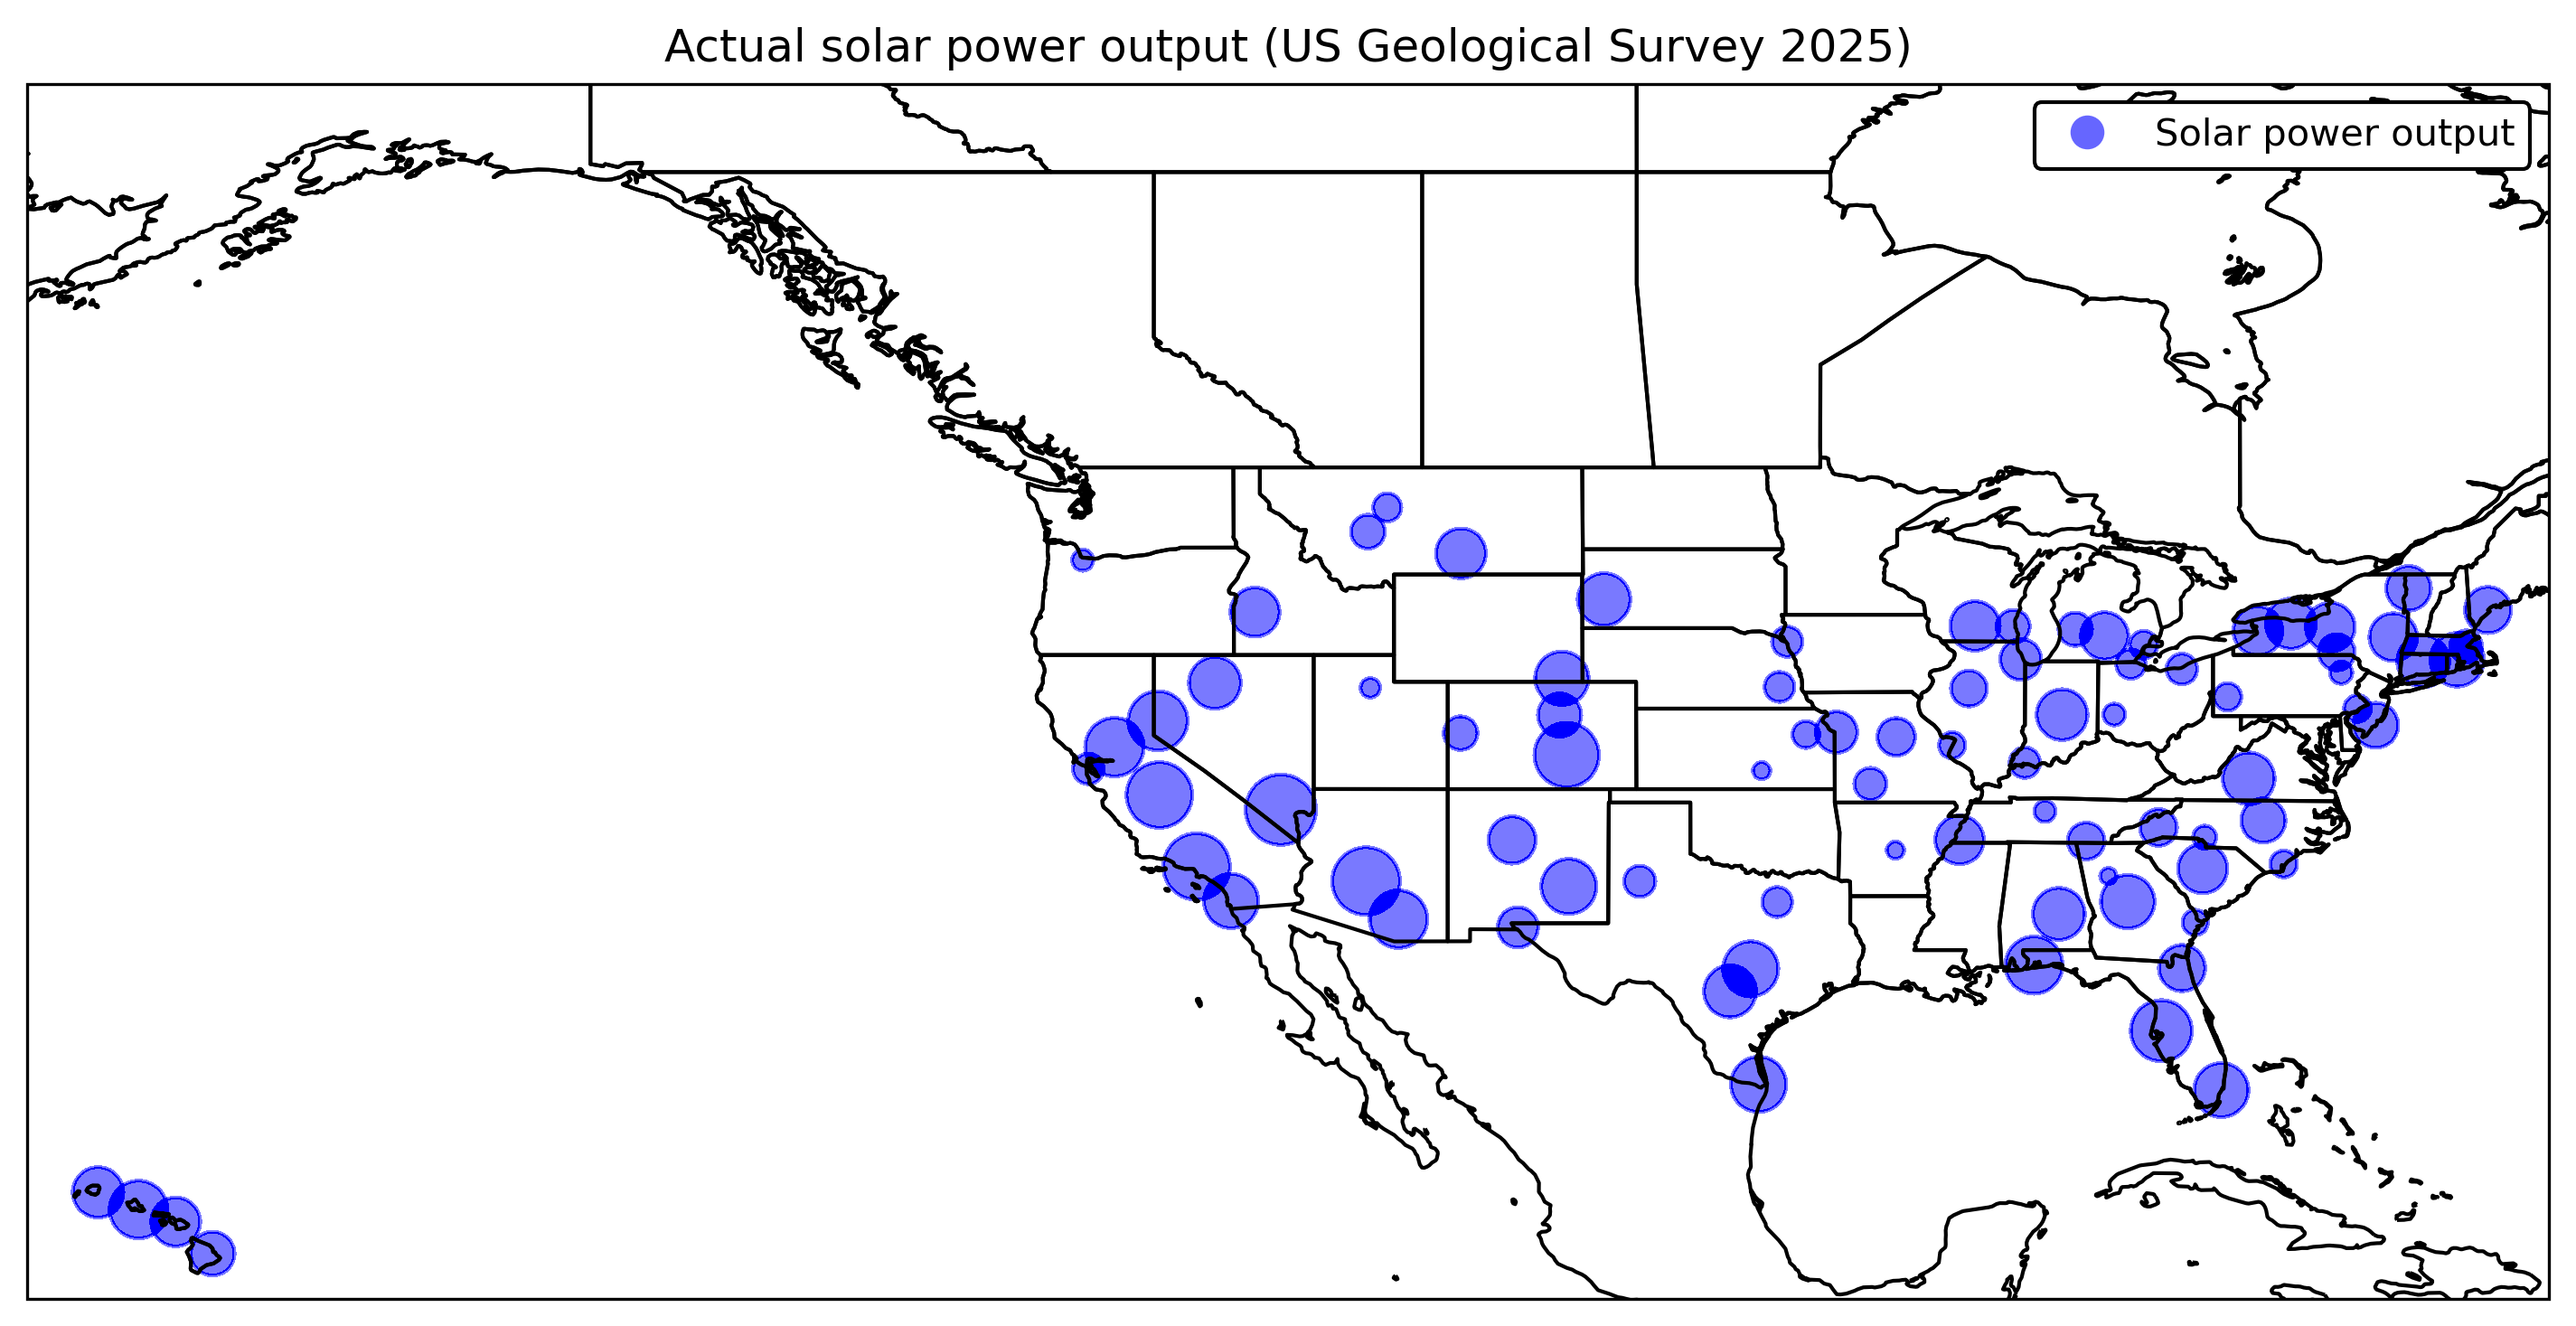

In [59]:
fig, ax = plt.subplots(
    figsize=(12.0,8.0),
    dpi=300,
    subplot_kw={'projection': ccrs.PlateCarree()}
    )

legend_circle = Line2D(
    [0], [0],
    marker='o', color='white',
    markerfacecolor='#6666ff', markersize=10,
    label='Solar power output'),
plt.legend(
    handles=legend_circle,
    edgecolor="black",
    framealpha=1.0
    )
#plt.legend.

ax.set_extent(
    [-162, -68, 18, 54.0],
    crs=ccrs.Geodetic()
    )

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.COASTLINE)

for city in df_solar.index:
    ax.scatter(
        df_solar['lng'], df_solar['lat'],
        s=df_solar['Current_log'] ** 1.2 * 25.0,
        color='blue', alpha=0.002,
        transform=ccrs.Geodetic(),
        label=city
        )

plt.title('Actual solar power output (US Geological Survey 2025)')
plt.show()

## 5 &emsp; Splitting the DataFrame for Training and Testing

Split the combined DataFrame into the training data set and the testing data set. The `train_test_split()` function in the scikit-learn shuffles and allocates 75% of records to the training data set and the remaining 25% for the test data set.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    df_solar.query('Current_log.notnull()').drop(['Current_log'], axis=1),
    df_solar.query('Current_log.notnull()')['Current_log'],
    random_state=42
    )

X_predict \
    = df_solar.query('Current_log.isnull()' ).drop(['Current_log'], axis=1)

In [61]:
X_predict.head()

,Land Value,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,lat,lng,population,density
City-State,,,,,,,,,,,,,,,,,
"FORT WAYNE,IN",227793.615240,50,55,57,63,69,74,76,75,67,60,40,36,41.0888,-85.1436,345279,919.8
"ALPENA,MI",191528.977768,36,43,51,55,59,62,66,60,52,41,28,25,45.0740,-83.4402,10178,480.9
"ANCHORAGE,AK",392428.040683,43,46,51,50,51,46,43,43,41,36,35,33,61.1508,-149.1091,289069,65.4
"BALTIMORE,MD",206499.969440,50,58,55,57,55,60,63,61,57,56,50,47,39.3051,-76.6144,2189589,2753.1
"POCATELLO,ID",317148.241331,38,55,63,64,68,74,82,80,78,68,43,36,42.8724,-112.4647,76370,649.5


## 6 &emsp; Predicting current

Apply the cross validation for multiple algorithms and hyperparameters: linear regression, k-nearest neighbor, decision tree, ridge regression, and support vector regression (SVR). Also use these algorithms to build a model of the ensemble voting regression. The following code snippets are based on the worksheet of Module 20 for this program: _"Comparing Aggregate Models for Regression"_ (try_it_20_1.ipynb). 7 May 2025.

In [62]:
reg_linear = LinearRegression()
reg_knn    = KNeighborsRegressor()
reg_tree   = DecisionTreeRegressor(random_state=42)
reg_ridge  = Ridge()

# Create pipelines for each regressor
pipelines = {
    'LinearRegression()':      Pipeline([
        ('scaler',    StandardScaler()),
        ('regressor', reg_linear)
        ]),
    'KNeighborsRegressor()':   Pipeline([
        ('scaler',    StandardScaler()),
        ('regressor', reg_knn)
        ]),
    'DecisionTreeRegressor()': Pipeline([
        ('regressor', reg_tree)
        ]),
    'Ridge()':                 Pipeline([
        ('scaler',    StandardScaler()),
        ('regressor', reg_ridge)
        ]),
    'SVR()':                   Pipeline([
        ('scaler',    StandardScaler()),
        ('regressor', SVR())
        ])
}

# Define the Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('LinearRegression()',      pipelines['LinearRegression()']),
    ('KNeighborsRegressor()',   pipelines['KNeighborsRegressor()']),
    ('DecisionTreeRegressor()', pipelines['DecisionTreeRegressor()']),
    ('Ridge()',                 pipelines['Ridge()']),
    ('SVR()',                   pipelines['SVR()'])
])

In [63]:
def evaluate_model(model, X_test, y_test, caps = False):
    y_pred = model.predict(X_test)
    
    if caps:
        y_min = 1.0  # Don't allow negative current
        y_pred[y_pred < y_min] = y_min

        y_max = df_solar['Current_log'].max()
        y_pred[y_pred > y_max] = y_max

    mse = mean_squared_error(y_test, y_pred)
    return mse

Cross-Validation (CV) Grid Search

In [64]:
# Define parameter grids for Grid Search
param_grids = {
    'LinearRegression()':      {},
    'KNeighborsRegressor()':   {'regressor__n_neighbors': [3, 5, 7]},
    'DecisionTreeRegressor()': {'regressor__max_depth':   [3, 5, 7]},
    'Ridge()':                 {'regressor__alpha':       [0.1, 1.0, 10.0]},
    'SVR()':                   {
                                'regressor__C':           [0.1, 1.0, 10.0],
                                'regressor__gamma':       ['scale', 'auto']
                               }
}

# Perform Grid Search and evaluate models
results_after_gs = {}
best_pipelines   = {}

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(
        pipeline, param_grids[name], cv=2, scoring='neg_mean_squared_error'
        )
    grid_search.fit(X_train, y_train)
    best_pipeline = grid_search.best_estimator_
    best_pipelines[name] = best_pipeline
    mse = evaluate_model(best_pipeline, X_test, y_test)
    results_after_gs[name] = mse

# Define the optimized Voting Regressor
optimized_voting_reg = VotingRegressor(estimators=[
    ('LinearRegression()',      best_pipelines['LinearRegression()']),
    ('KNeighborsRegressor()',   best_pipelines['KNeighborsRegressor()']),
    ('DecisionTreeRegressor()', best_pipelines['DecisionTreeRegressor()']),
    ('Ridge()',                 best_pipelines['Ridge()']),
    ('SVR()',                   best_pipelines['SVR()'])
])

# Fit the optimized Voting Regressor
optimized_voting_reg.fit(X_train, y_train)
voting_mse_after_gs = evaluate_model(optimized_voting_reg, X_test, y_test)
results_after_gs['VotingRegressor()'] = voting_mse_after_gs

# Print results after grid search
print("Results After Grid Search:")
for name, mse in results_after_gs.items():
    print("MSE: ", name, "...", round(mse,4))

Results After Grid Search:
MSE:  LinearRegression() ... 5.629
MSE:  KNeighborsRegressor() ... 3.5584
MSE:  DecisionTreeRegressor() ... 4.9343
MSE:  Ridge() ... 4.6874
MSE:  SVR() ... 3.1469
MSE:  VotingRegressor() ... 3.6852


In [65]:
scaled_pipe = Pipeline([
    ('scaler',    StandardScaler()),
    ('regressor', SVR(C=1.0, gamma='auto'))
]).fit(X_train,y_train)

y_pred = scaled_pipe.predict(X_test)

print(
    "MSE: SVR(C = 1.0) with Standard Scaler ...",
    round(mean_squared_error(y_test, y_pred),4)
    )

print()

print(
    "Actual Current_log vs. Predicted Current_log:",
    "SVR(C = 1.0)\n\n",
)
print()
pd.concat(
    [
        X_test.reset_index()['City-State'],
        y_test.reset_index(drop=True),
        pd.DataFrame(y_pred, columns=['Current-Pred']).reset_index(drop=True)
    ],
    axis=1
).head(10)

MSE: SVR(C = 1.0) with Standard Scaler ... 3.1469

Actual Current_log vs. Predicted Current_log: SVR(C = 1.0)





,City-State,Current_log,Current-Pred
0,"AUSTIN,TX",6.002899,3.458421
1,"BOISE,ID",4.945919,3.753608
2,"COLUMBIA,SC",4.991792,3.728907
3,"NASHVILLE,TN",1.223775,3.012217
4,"GREAT FALLS,MT",1.960095,3.133534
5,"DETROIT,MI",1.916923,2.962694
6,"BROWNSVILLE,TX",6.042633,3.770637
7,"PORTLAND,ME",4.464758,4.394165
8,"ALBUQUERQUE,NM",4.642466,4.980728
9,"PUEBLO,CO",7.817183,5.261269


Repeat this analysis for the ensemble technique with the voting regressor algorithm:

In [66]:
y_pred = optimized_voting_reg.predict(X_test)

print(
    "MSE: Ensemble Voting Regressor with Standard Scaler ...",
    round(mean_squared_error(y_test, y_pred),4)
    )

print()

print(
    "Actual Current_log vs. Predicted Current_log: "
    "Ensemble Voting Regressor"
)
print()
pd.concat(
        [
            X_test.reset_index()['City-State'],
            y_test.reset_index(drop=True),
            pd.DataFrame(y_pred, columns=['Current_predict']).reset_index(drop=True)
        ],
        axis=1
    ).head(10)

MSE: Ensemble Voting Regressor with Standard Scaler ... 3.6852

Actual Current_log vs. Predicted Current_log: Ensemble Voting Regressor



,City-State,Current_log,Current_predict
0,"AUSTIN,TX",6.002899,3.459412
1,"BOISE,ID",4.945919,3.795715
2,"COLUMBIA,SC",4.991792,3.232365
3,"NASHVILLE,TN",1.223775,2.904647
4,"GREAT FALLS,MT",1.960095,3.280370
5,"DETROIT,MI",1.916923,2.936403
6,"BROWNSVILLE,TX",6.042633,3.075307
7,"PORTLAND,ME",4.464758,4.431428
8,"ALBUQUERQUE,NM",4.642466,4.865975
9,"PUEBLO,CO",7.817183,5.556852


The prediction list looks quite similar to the one from the SVR model. The ensemble voting regressor predicted closer in some records: Austin, Boise, Nashville, and so on; whereas SVR outperformed in Columbia, Great Falls, and a few other city records.

### 6.1 &emsp; Feature coefficient analysis

You have built a model which was based on the support vector regression with the inverse of the regularization strength of 1.0. Check the weight coefficients of every feature and see the priority of features to predict the current:

In [67]:
print("Permutation Importance from SVR(C=1.0, gamma='auto'):")
result_svr = permutation_importance(
    best_pipelines['SVR()'], 
    X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
    )

perm_importances_svr = pd.DataFrame({
    'feature':    X_test.columns,
    'importance': result_svr.importances_mean
    })

perm_importances_svr = perm_importances_svr\
    .sort_values(by='importance', ascending=False)

print(perm_importances_svr.set_index('feature'))

Permutation Importance from SVR(C=1.0, gamma='auto'):
            importance
feature               
lat           0.058682
MAR           0.045618
APR           0.036491
DEC           0.024510
MAY           0.022250
JAN           0.018695
FEB           0.017350
JUL           0.017348
population    0.013674
NOV           0.009247
SEP           0.008612
AUG           0.002530
JUN          -0.001248
Land Value   -0.003987
OCT          -0.005272
lng          -0.016822
density      -0.036010


## 7 &emsp; Predict current of new cities

So far you have built several models using the training data set, verified the model accuracy by comparing their predicted values with the actual power output in the test data set, and picked the best algorithm and hyperparameters: the support vector regression (SVR) with the inverse of the regularization parameter $C = 1.0$. The kernel coefficient was set to _"auto"_ which uses $1 / n_{\mathrm{features}}$.

Do not reuse this model to predict the potential power output in the incomplete data set. Instead, rebuild one with the same algorithm and hyperparameter and train the model using both the training data set and the test data set to increase the model accuracy. Then use this new model to predict potential power output of the cities listed in the incomplete data set.

In [68]:
X = df_solar.query('Current_log.notnull()').drop(['Current_log'], axis=1)
y = df_solar.query('Current_log.notnull()')['Current_log']

scaled_pipe = Pipeline([
    ('scaler',    StandardScaler()),
    ('regressor', SVR(C=1.0, gamma='auto'))
]).fit(X,y)

y_pred = scaled_pipe.predict(X_predict)

In [69]:

df_pred = X_predict
df_pred['Land Value'] = df_pred['Land Value']

df_pred['Current_log'] = y_pred
df_pred['Current']     = np.exp(y_pred)

Verify that the predicted currents are reasonable enough:

In [70]:
df_pred[['Current_log','Current']].describe()

,Current_log,Current
count,49.000000,49.000000
mean,3.663875,50.143157
std,0.678028,42.638214
min,2.575873,13.142783
25%,3.181916,24.092875
50%,3.662747,38.968234
75%,4.039017,56.770501
max,5.372302,215.358057


Those predicted currents look reasonable because they range between $\log{2.57}$ and $\log{5.37}$ or 13.14 MWh and 215.3 MWh.

The new cities with the five highest predicted currents in the following list may be the most favorable ones to build new solar power plants:

In [76]:
df_pred.sort_values(by='Current', ascending=False).head()

,Land Value,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,lat,lng,population,density,Current_log,Current
City-State,,,,,,,,,,,,,,,,,,,
"KEY WEST,FL",1.285406e+06,74,76,84,85,82,77,79,78,74,72,71,73,24.5642,-81.7775,25824,1780.7,5.372302,215.358057
"FLAGSTAFF,AZ",6.500107e+05,71,73,72,82,83,88,74,75,79,77,72,76,35.1872,-111.6194,77868,446.4,5.188595,179.216627
"JUNEAU,AK",4.909402e+05,39,35,38,42,44,37,33,35,27,21,26,21,58.4546,-134.1739,31969,4.6,4.972566,144.396873
"ANCHORAGE,AK",3.924280e+05,43,46,51,50,51,46,43,43,41,36,35,33,61.1508,-149.1091,289069,65.4,4.859519,128.962104
"LAKE CHARLES,LA",2.115102e+05,46,48,65,65,77,80,81,83,83,77,55,49,30.2010,-93.2111,145110,664.4,4.753881,116.033757


The new cities with the five lowest predicted currents in the following list may be the least favorable ones to build new solar power plants:

In [72]:
df_pred.sort_values(by='Current', ascending=True).head()

,Land Value,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,lat,lng,population,density,Current_log,Current
City-State,,,,,,,,,,,,,,,,,,,
"DES MOINES,IA",227345.519805,50,54,55,55,61,69,74,70,66,59,45,43,41.5725,-93.6105,560170,930.5,2.575873,13.142783
"OMAHA,NE",278435.577453,56,57,59,59,65,72,74,74,64,63,49,47,41.2627,-96.0529,826161,1318.9,2.665842,14.380056
"FORT WAYNE,IN",227793.615240,50,55,57,63,69,74,76,75,67,60,40,36,41.0888,-85.1436,345279,919.8,2.701583,14.903301
"SPRINGFIELD,IL",181895.992733,50,53,51,54,61,68,71,67,66,61,45,40,39.7709,-89.6540,156240,716.7,2.775195,16.041750
"BISMARCK,ND",326276.702615,54,52,61,58,64,67,75,72,67,53,42,45,46.8143,-100.7694,99060,825.4,2.817671,16.737818


Plot those predicted solar power output on the US map:

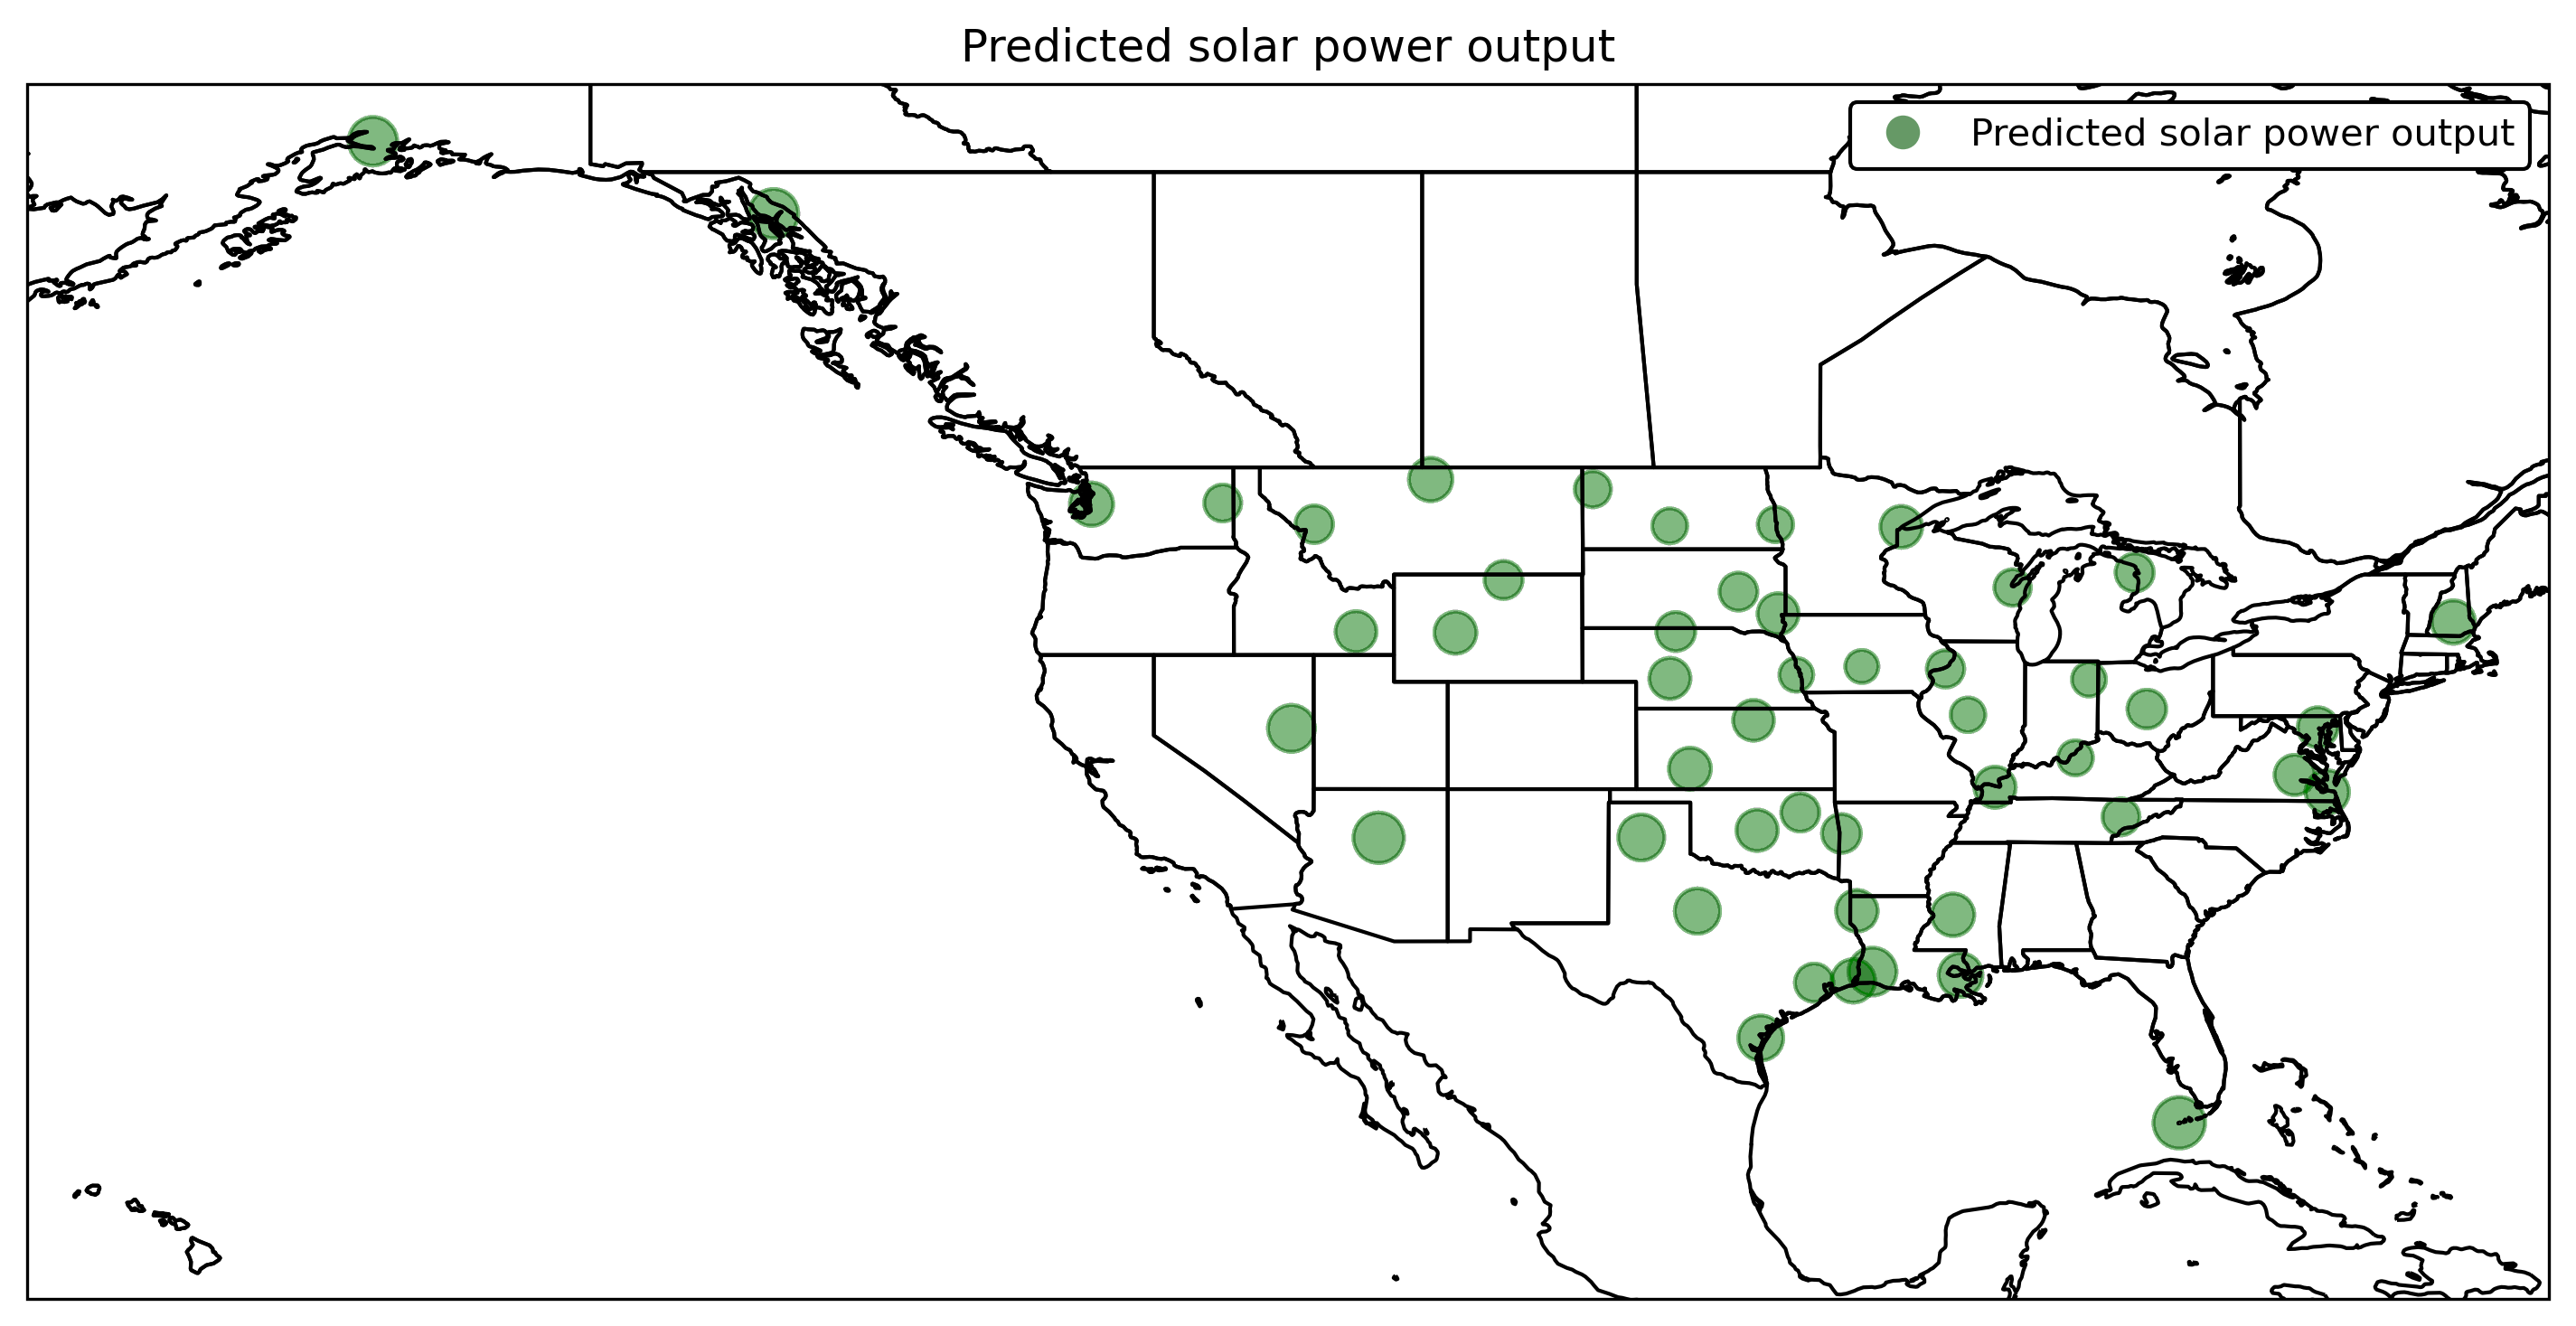

In [73]:
fig, ax = plt.subplots(
    figsize=(12.0,8.0),
    dpi=300,
    subplot_kw={'projection': ccrs.PlateCarree()}
    )

legend_circle = Line2D(
    [0], [0],
    marker='o', color='white',
    markerfacecolor='#669966', markersize=10,
    label='Predicted solar power output'),
plt.legend(
    handles=legend_circle,
    edgecolor="black",
    framealpha=1.0
    )

ax.set_extent(
    [-162, -68, 18, 54.0],
    crs=ccrs.Geodetic()
    )

ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.COASTLINE)

for city in df_pred.index:
    ax.scatter(
        df_pred['lng'], df_pred['lat'],
        s=df_pred['Current_log'] ** 1.2 * 25.0,
        color='green', alpha=0.01,
        transform=ccrs.Geodetic(),
        label=city
        )

plt.title('Predicted solar power output')
plt.show()